In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline 
a4_dims = (19,11)

In [22]:
mu, sigma = 0, 0.1
np.random.normal(mu, sigma, 100)

array([ 0.27858495,  0.01543028,  0.16212209,  0.04915158,  0.00703835,
       -0.04864067, -0.1634949 ,  0.07190836,  0.24427665,  0.02260359,
        0.20913979, -0.09897471, -0.14271765, -0.04428031, -0.1151711 ,
        0.02244011, -0.12161704, -0.06225062, -0.03779147, -0.03534103,
        0.07628393, -0.16888013, -0.02280062, -0.13946564,  0.09338154,
        0.02821499, -0.09416003, -0.068029  ,  0.02344253, -0.04849962,
       -0.10686884, -0.04218166, -0.09497019, -0.06533901, -0.02484692,
       -0.01975712, -0.04649301, -0.19629029, -0.14314654,  0.05396923,
       -0.10688243,  0.16313033, -0.0930095 , -0.14017823, -0.07907473,
       -0.12970869,  0.18883738,  0.18968486,  0.04436802,  0.00990547,
        0.10532146,  0.00162386, -0.0371181 ,  0.00974653, -0.11336377,
       -0.06173216,  0.21723838, -0.02683261,  0.13769588, -0.12531095,
       -0.07534069,  0.01785906,  0.06576301,  0.04180629,  0.08126691,
        0.12358127, -0.11116563, -0.07404275,  0.06657592, -0.07

Creating sample normally distributed data for basketball and soccer athlete data to demonstrate supervised vs unsupervised learning.

In [23]:
samples = 300

In [24]:
muBasketball, sigmaBasketball = 100 , 5
bball_weight = np.random.normal(muBasketball, sigmaBasketball, samples)

In [25]:
muBasketball, sigmaBasketball = 2 , 0.2
bball_height = np.random.normal(muBasketball, sigmaBasketball, samples)

In [26]:
muSoccer, sigmaSoccer = 77 , 5
soccer_weight = np.random.normal(muSoccer, sigmaSoccer, samples)

In [27]:
muSoccer, sigmaSoccer = 1.8 , 0.2
soccer_height = np.random.normal(muSoccer, sigmaSoccer, samples)

In [28]:
label = []
label= (["soccer"] * len(soccer_weight)) + (["basketball"] * len(bball_weight))

weight = []
weight = [*soccer_weight,*bball_weight]

height = []
height = [*soccer_height,*bball_height]

In [29]:
dataDict = { 'height': height, 'weight': weight, 'label': label}
df = pd.DataFrame(dataDict)

In [30]:
df.head()

,height,weight,label
0,1.778782,77.805331,soccer
1,1.918350,78.818063,soccer
2,1.707444,78.153438,soccer
3,1.474477,71.200179,soccer
4,1.785068,80.451750,soccer


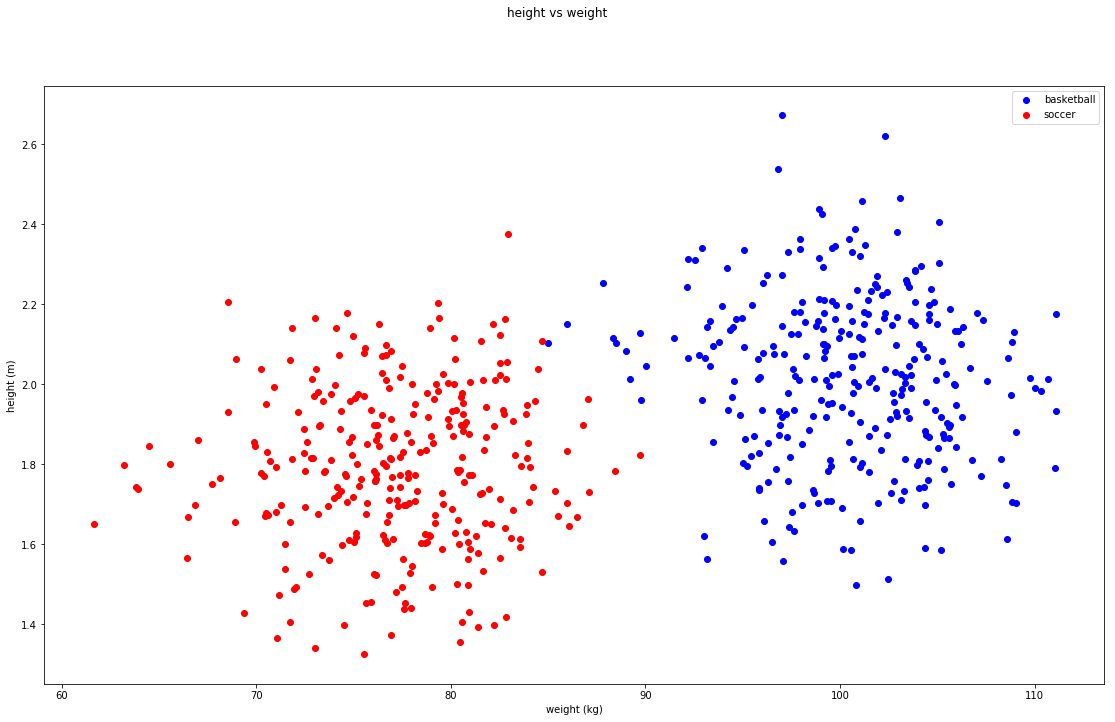

In [31]:
fig = plt.figure(figsize = a4_dims)
plt.suptitle("height vs weight")
plt.scatter(x=bball_weight, y=bball_height, color="b")
plt.scatter(x=soccer_weight, y=soccer_height, color='r')
plt.xlabel("weight (kg)")
plt.ylabel("height (m)")
plt.legend(["basketball", "soccer"])

encode categorical data

In [32]:
df.head(5)

,height,weight,label
0,1.778782,77.805331,soccer
1,1.918350,78.818063,soccer
2,1.707444,78.153438,soccer
3,1.474477,71.200179,soccer
4,1.785068,80.451750,soccer


adding garbage data into dataset. every 7th value will be garbage (-1). Also randomly mixed in the data will be nan values. This is to create data for a data challenge.

In [33]:
import random
for x in range(int(len(dataDict["label"])*0.1)):
    rand_missing = random.randint(0,1)
    rand_idx = random.randint(0,len(dataDict["height"]))
    dataDict["height"].insert(rand_idx, np.nan)
    dataDict["weight"].insert(rand_idx, np.nan)
    if rand_missing == 0:
        dataDict["label"].insert(rand_idx, np.nan)
    else:
        dataDict["label"].insert(rand_idx, dataDict["label"][rand_idx])

In [34]:
print("length of height: {} , length of weight: {} , length of label: {}".format(len(dataDict["height"]), len(dataDict["weight"]), len(dataDict["label"])))
for idx in enumerate(dataDict["label"]):
    if idx[0] % 7 == 0:
        dataDict["height"].insert(idx[0], -1)
        dataDict["weight"].insert(idx[0], -1)
        dataDict["label"].insert(idx[0], dataDict["label"][idx[0]])
        
print("length of height: {} , length of weight: {} , length of label: {}".format(len(dataDict["height"]), len(dataDict["weight"]), len(dataDict["label"])))


length of height: 660 , length of weight: 660 , length of label: 660
length of height: 770 , length of weight: 770 , length of label: 770


In [35]:
dataDict

{'height': [-1,
  1.77878249466137,
  nan,
  1.9183495380054716,
  1.707444338639565,
  1.4744765290571265,
  1.7850680371814855,
  -1,
  1.6110310577705191,
  1.793605265798904,
  1.7626066895392007,
  1.8243849415222897,
  1.932847699506419,
  1.7275477802149486,
  -1,
  nan,
  1.8617553371855107,
  1.6856009795775615,
  1.8793070437182526,
  1.5003884868562556,
  2.002210984906773,
  -1,
  1.5259533590127732,
  1.8975550377596053,
  1.964437942894477,
  1.3262048389303351,
  1.6727185036733525,
  1.4997513803742184,
  -1,
  1.8527344164043646,
  nan,
  1.7971128431025363,
  1.8010279876579522,
  1.8954635396927912,
  1.6415587324992853,
  -1,
  1.778517864868197,
  nan,
  1.601793446366426,
  1.4942857031647607,
  1.7431184269656024,
  1.8973688433221723,
  -1,
  nan,
  1.866962087169777,
  1.6208087212826396,
  1.9994137615047876,
  2.0535192043827286,
  1.6767023390057938,
  -1,
  1.6224347391828036,
  1.8155752662089333,
  nan,
  1.7590005385663998,
  1.872554799784796,
  1.82957

In [36]:
challengeDF = pd.DataFrame(dataDict)

In [37]:
challengeDF

,height,weight,label
0,-1.000000,-1.000000,soccer
1,1.778782,77.805331,soccer
2,NaN,NaN,NaN
3,1.918350,78.818063,soccer
4,1.707444,78.153438,soccer
5,1.474477,71.200179,soccer
6,1.785068,80.451750,soccer
7,-1.000000,-1.000000,soccer
8,1.611031,76.614705,soccer
9,1.793605,71.011012,soccer


In [38]:
data = {'Data': challengeDF.to_dict('records')}
import json
with open('data.json', 'w') as outfile:
  json.dump(data, outfile, indent=1, default=str)

In [39]:
def encode_label(category):
    if category == "soccer":
        return 1
    elif category == "basketball":
        return 0
    
    

In [40]:
df["target"] = df["label"].apply(lambda label: encode_label(label))

In [41]:
df.head()

,height,weight,label,target
0,1.778782,77.805331,soccer,1
1,1.918350,78.818063,soccer,1
2,1.707444,78.153438,soccer,1
3,1.474477,71.200179,soccer,1
4,1.785068,80.451750,soccer,1


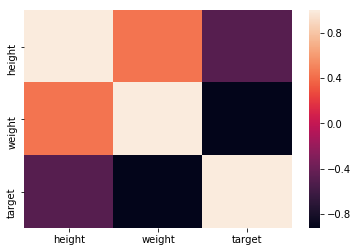

In [42]:
sns.heatmap(df.corr())

In [43]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

C:\apps\anaconda2\envs\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
X = df.ix[:,(0,1)].values
y = df.ix[:,3].values
X

C:\apps\anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\apps\anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array([[  1.77878249,  77.80533124],
       [  1.91834954,  78.81806281],
       [  1.70744434,  78.15343788],
       ...,
       [  1.87452894, 102.42459337],
       [  2.11273497, 101.15416833],
       [  2.03692827, 102.29672705]])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
LogReg = LogisticRegression(C=1000, max_iter=1000)
LogReg.fit(x_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred_train = LogReg.predict(x_train)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(LogReg.score(x_train, y_train)))    

Accuracy of logistic regression classifier on training set: 1.00


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
confusion_matrix

array([[204,   1],
       [  0, 215]], dtype=int64)

In [49]:
y_pred = LogReg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(x_test, y_test)))    

Accuracy of logistic regression classifier on test set: 0.99


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[94,  1],
       [ 1, 84]], dtype=int64)

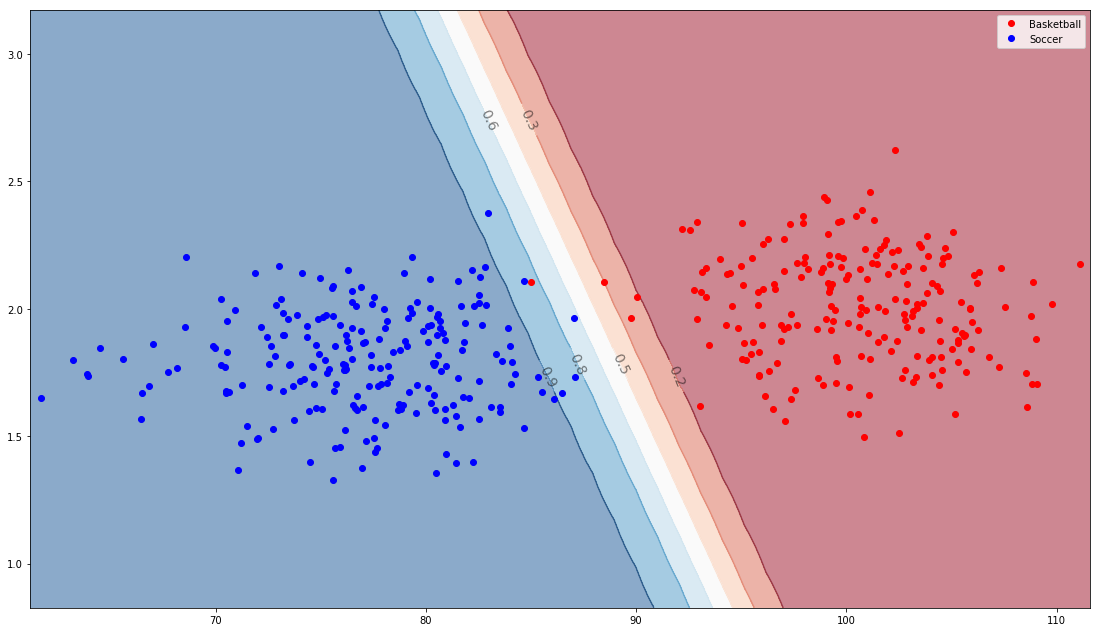

In [51]:
fig = plt.figure(figsize = a4_dims)
# evenly sampled points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
yy, xx = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z = LogReg.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the training points
ax.plot(x_train[y_train == 0, 1], x_train[y_train == 0, 0], 'ro', label='Basketball')
ax.plot(x_train[y_train == 1, 1], x_train[y_train == 1, 0], 'bo', label='Soccer')

# make legend
plt.legend(loc='upper right', scatterpoints=1, numpoints=1)

In [52]:
len(x_test)

180

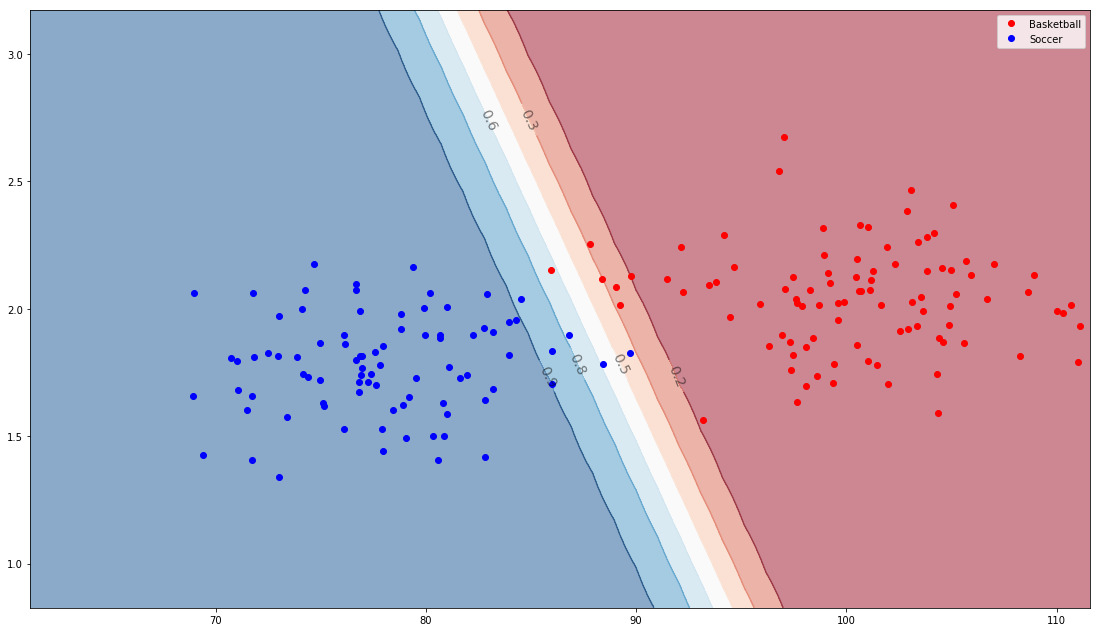

In [53]:
fig = plt.figure(figsize = a4_dims)
# evenly sampled points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
yy, xx = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z = LogReg.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the test points
ax.plot(x_test[y_test == 0, 1], x_test[y_test == 0, 0], 'ro', label='Basketball')
ax.plot(x_test[y_test == 1, 1], x_test[y_test == 1, 0], 'bo', label='Soccer')

# make legend
plt.legend(loc='upper right', scatterpoints=1, numpoints=1)


Unsupervised learning

Text(0,0.5,'height (m)')

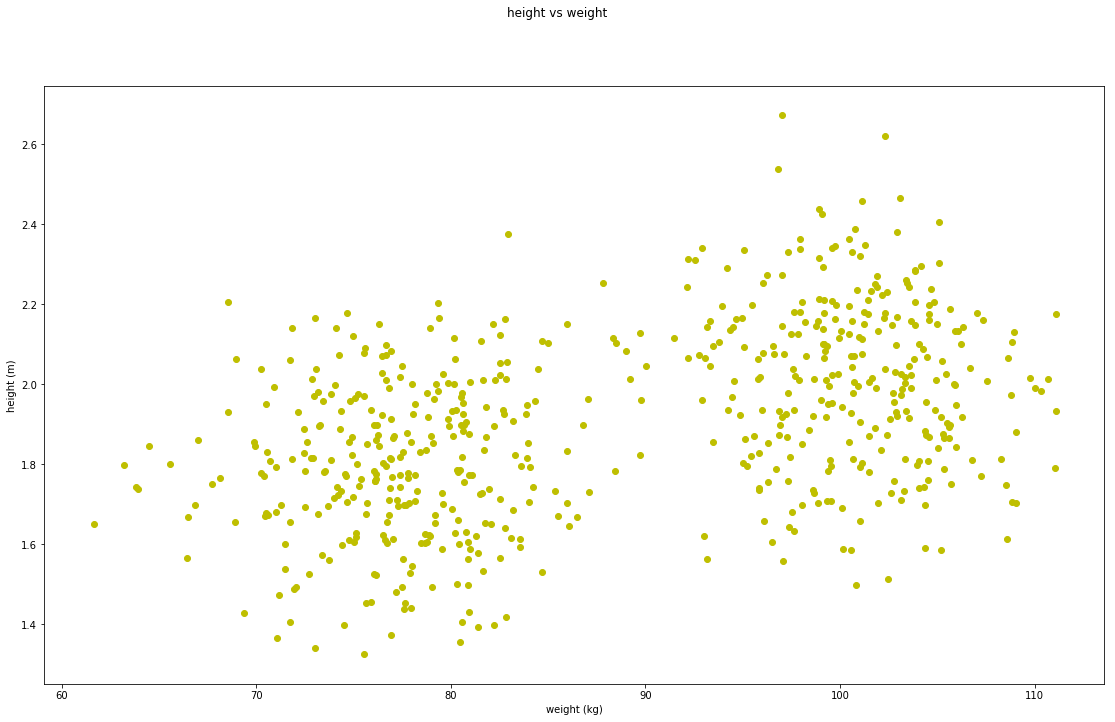

In [54]:
fig = plt.figure(figsize = a4_dims)
plt.suptitle("height vs weight")
plt.scatter(x=bball_weight, y=bball_height, color="y")
plt.scatter(x=soccer_weight, y=soccer_height, color='y')
plt.xlabel("weight (kg)")
plt.ylabel("height (m)")

Supervised learning (logistic regression)

In [55]:
data = pd.get_dummies(df, columns = ['height', 'weight'])

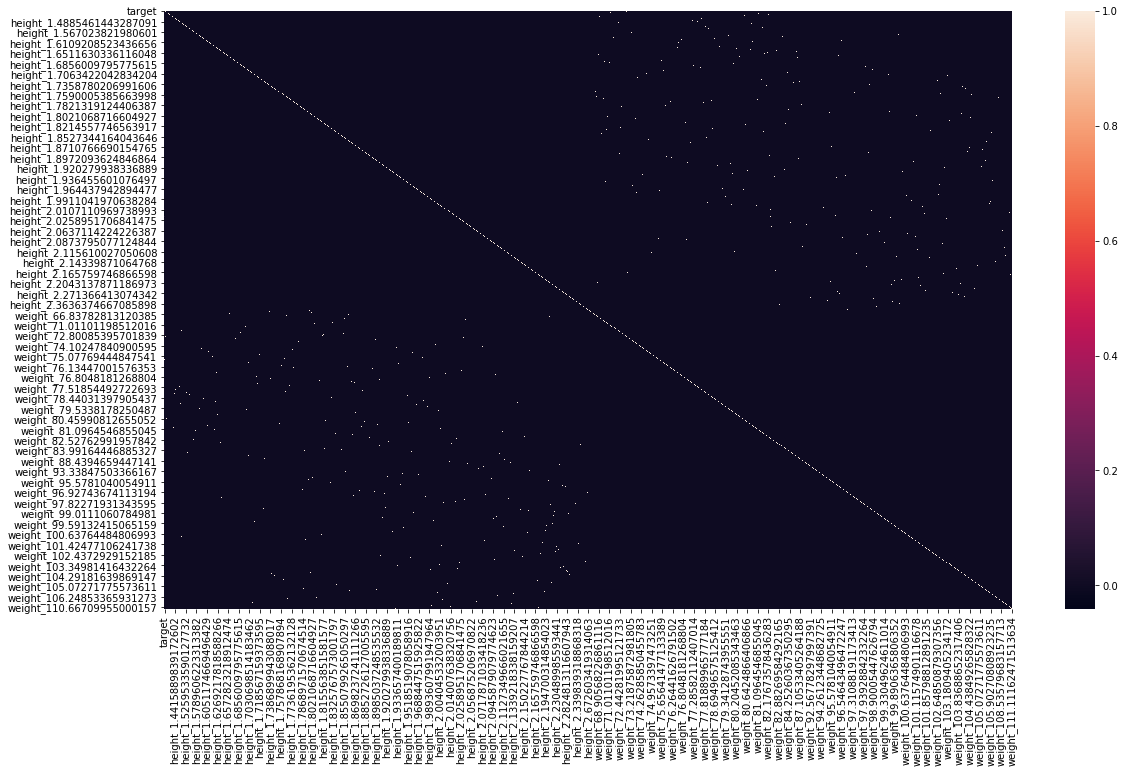

In [56]:
fig = plt.figure(figsize = a4_dims)

sns.heatmap(data.corr())

In [57]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
X_train.shape

(450, 1201)

In [59]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Unsupervised learning (k-means)

In [60]:
#pop out the labels so we can cluster
df_cluster = df
df_cluster.pop('label');

Text(0,0.5,'height (m)')

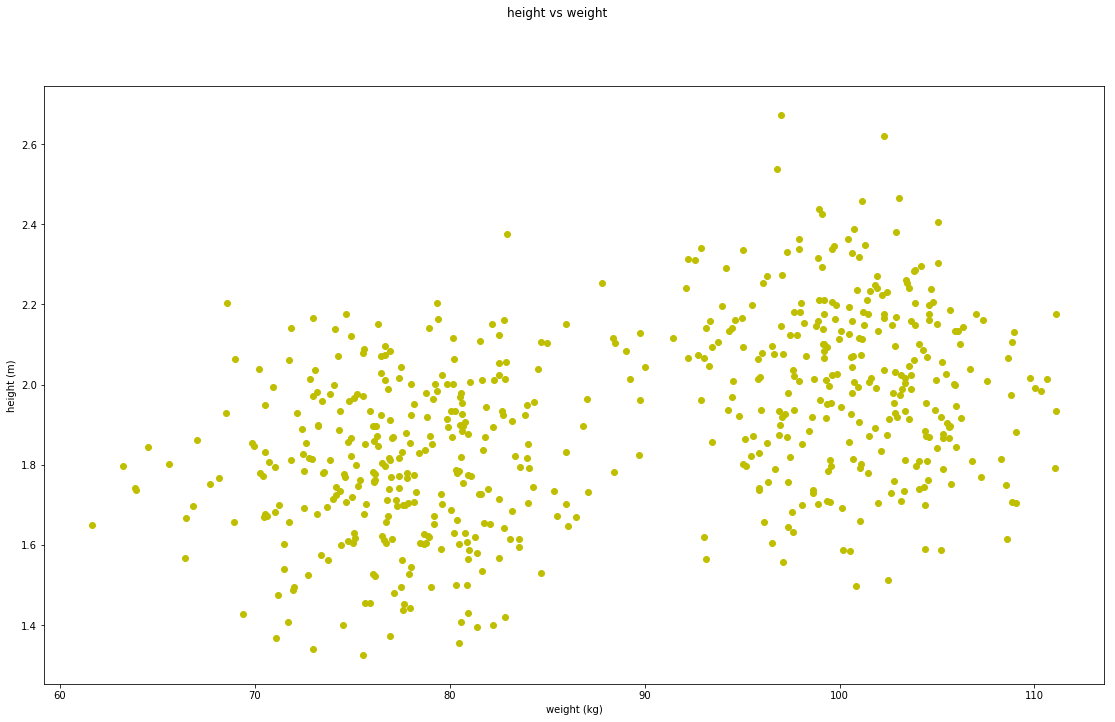

In [61]:
fig = plt.figure(figsize = a4_dims)
plt.suptitle("height vs weight")
plt.scatter(x=df_cluster['weight'], y=df_cluster['height'], color="y")
plt.xlabel("weight (kg)")
plt.ylabel("height (m)")

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_cluster)
y_kmeans = kmeans.predict(df_cluster)

Text(0,0.5,'height (m)')

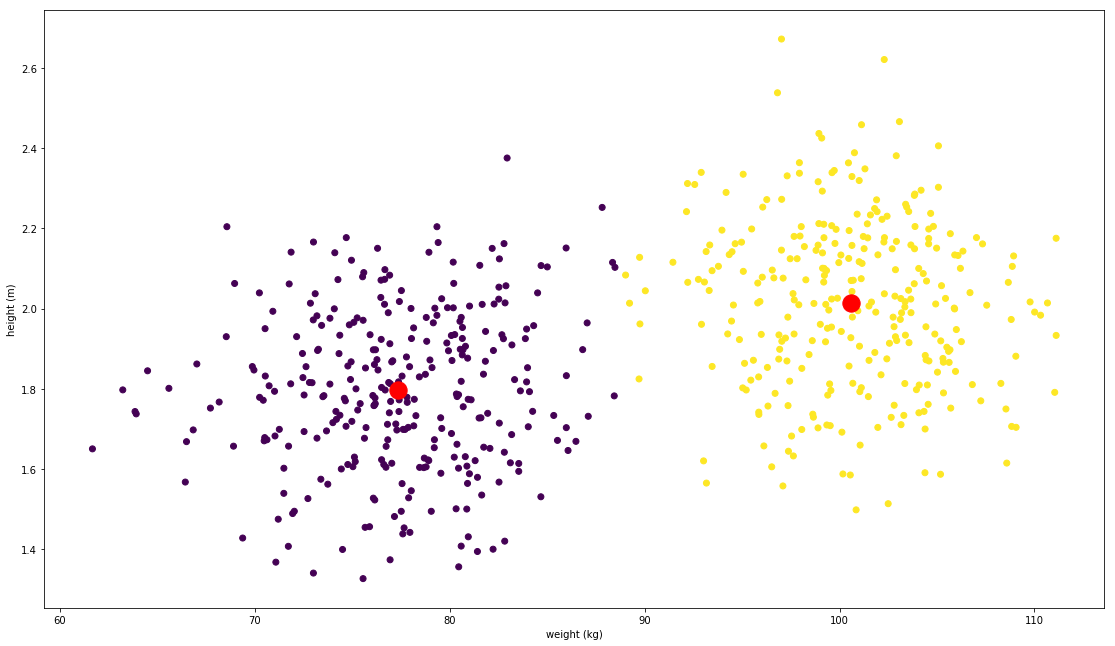

In [64]:
fig = plt.figure(figsize = a4_dims)

plt.scatter(df_cluster["weight"], df_cluster["height"], c = y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1],centers[:,0], c='red', s=300.0)
plt.xlabel("weight (kg)")
plt.ylabel("height (m)")

In [65]:
from sklearn.datasets import make_circles
x,y = sklearn.datasets.make_circles(n_samples=300, shuffle=False, noise=0.15, factor=0.1)
x[:,0]=x[:,0]+90
x[:,1]=x[:,1]+2

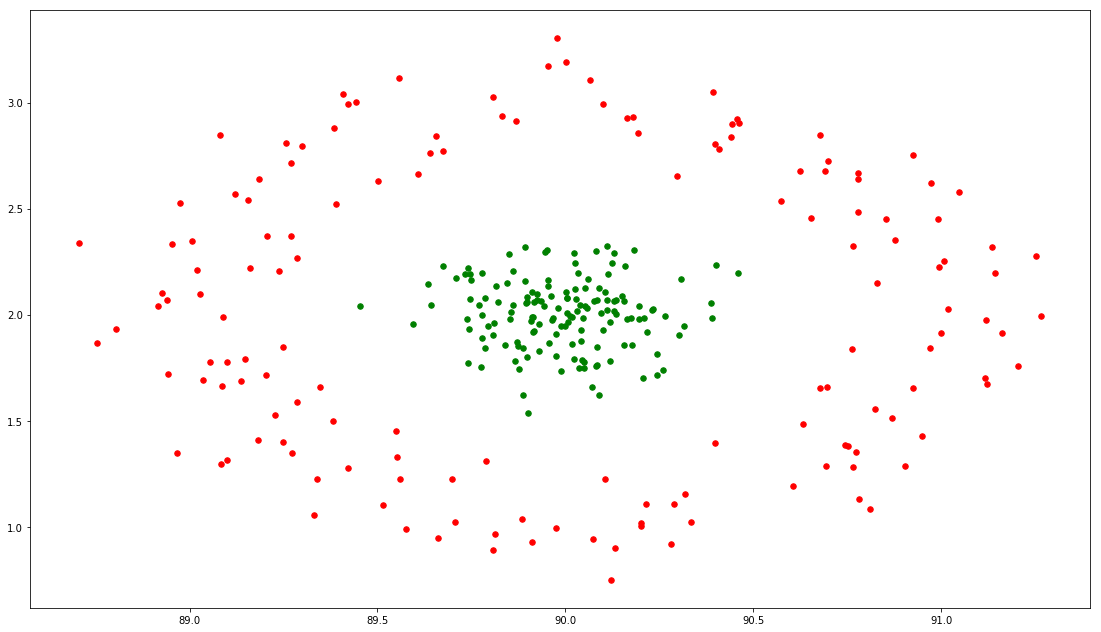

In [66]:
fig = plt.figure(figsize = a4_dims)

plt.scatter(x[0:int(len(y) / 2),0], x[0:int(len(y) / 2),1], c='red', s=30.0)
plt.scatter(x[int(len(y) / 2):,0], x[int(len(y) / 2):,1], c='green', s=30.0)

In [67]:
x[0:int(len(y) / 2),1]

array([2.02638429, 2.19527446, 1.99530453, 2.31647623, 2.35307406,
       2.5769645 , 2.48385485, 2.15000593, 2.2541866 , 2.22586036,
       2.27516433, 2.67903297, 2.44998675, 2.62159415, 2.45106119,
       2.32498058, 2.67752707, 2.75417309, 2.53493888, 2.45633364,
       2.66549409, 2.7830112 , 2.63782483, 2.90542413, 2.72493731,
       2.92277649, 2.84617858, 2.85500961, 2.80619296, 2.89661319,
       2.65456525, 3.05010266, 2.99211024, 2.83842429, 2.92989054,
       3.10793761, 3.18967702, 2.92923162, 2.93743428, 2.91103082,
       3.30424981, 2.84309847, 2.76240369, 2.77068717, 3.172599  ,
       2.62807503, 3.11724852, 2.7938087 , 3.04170513, 2.99390032,
       3.00152127, 2.66343098, 2.88041154, 2.81043036, 3.02789907,
       2.56758148, 2.51995552, 2.52568666, 2.37131729, 2.71359332,
       2.84721137, 2.6388166 , 2.53813037, 2.3324577 , 2.20337825,
       2.33812093, 2.36969669, 2.26465201, 2.34595383, 2.22007052,
       2.21183017, 2.10384534, 2.09786821, 2.06883797, 1.93233

In [68]:
len(x[int(len(y)/2):,1])

150

In [69]:
y[int(len(y)/2):]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [70]:
y[:int(len(y)/2)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

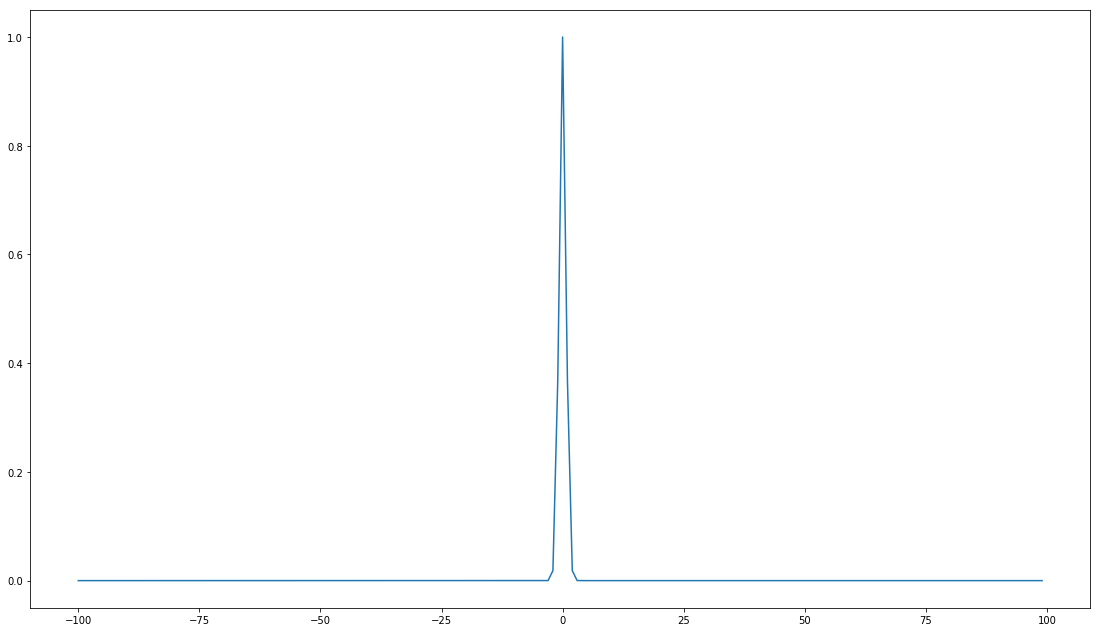

In [71]:
def my_dist(x):
    return np.exp(-x ** 2)

fig = plt.figure(figsize = a4_dims)
x = np.arange(-100, 100)
p = my_dist(x)
plt.plot(x, p)
plt.show()

simulating ECG signal

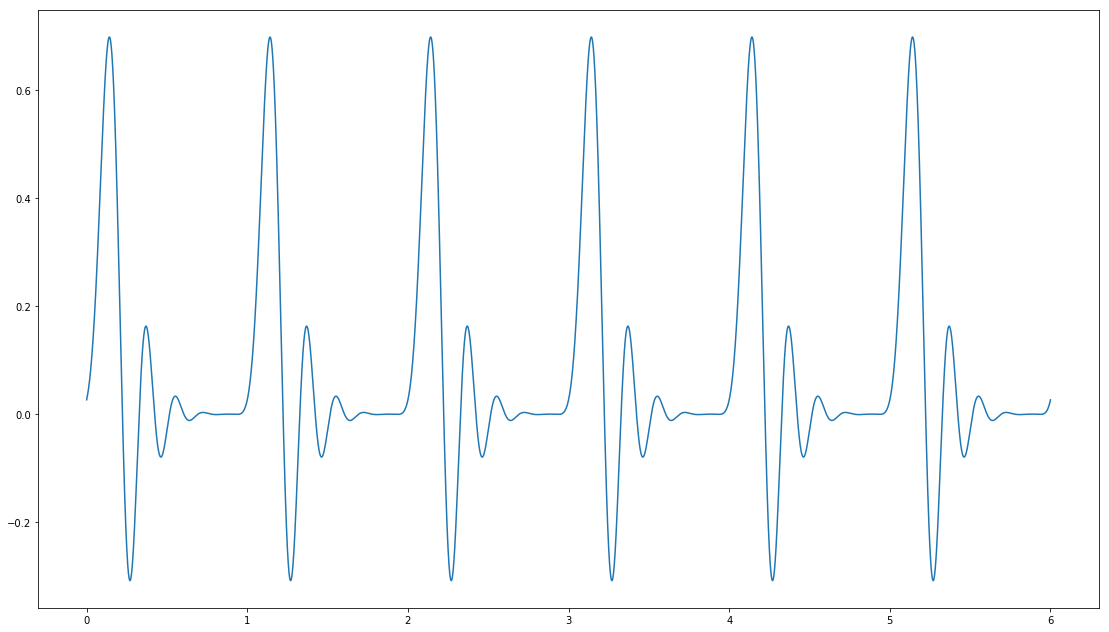

In [72]:
import scipy
import scipy.signal as sig
rr = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0] # rr time in seconds
#rr = [1.0, 1.0, 0.5, 1.5, 1.0, 1.0] # rr time in seconds
fs = 8000.0 # sampling rate
pqrst = sig.wavelets.daub(10) # just to simulate a signal, whatever
ecg = scipy.concatenate([sig.resample(pqrst, int(r*fs)) for r in rr])
t = scipy.arange(len(ecg))/fs
fig = plt.figure(figsize = a4_dims)
plt.plot(t, ecg)
plt.show()


In [73]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-1.0 * z))
    return s

In [74]:
sigmoid(0)

0.5

In [75]:
sig = sigmoid(np.linspace(-2,1,250))
sig = np.append(sig, np.flip(sig,0))
sig

array([0.11920292, 0.12047372, 0.12175619, 0.12305041, 0.12435643,
       0.12567433, 0.12700417, 0.12834602, 0.12969994, 0.13106599,
       0.13244424, 0.13383475, 0.13523758, 0.1366528 , 0.13808047,
       0.13952064, 0.14097337, 0.14243873, 0.14391676, 0.14540753,
       0.1469111 , 0.14842751, 0.14995682, 0.15149909, 0.15305436,
       0.15462269, 0.15620412, 0.15779871, 0.15940651, 0.16102755,
       0.16266189, 0.16430956, 0.16597062, 0.1676451 , 0.16933305,
       0.1710345 , 0.17274949, 0.17447806, 0.17622023, 0.17797606,
       0.17974556, 0.18152877, 0.18332572, 0.18513643, 0.18696093,
       0.18879924, 0.19065139, 0.1925174 , 0.19439729, 0.19629107,
       0.19819876, 0.20012038, 0.20205593, 0.20400543, 0.20596888,
       0.20794629, 0.20993766, 0.21194301, 0.21396232, 0.21599559,
       0.21804283, 0.22010403, 0.22217917, 0.22426826, 0.22637127,
       0.22848819, 0.230619  , 0.2327637 , 0.23492224, 0.23709462,
       0.23928081, 0.24148077, 0.24369448, 0.2459219 , 0.24816

create point anomaly

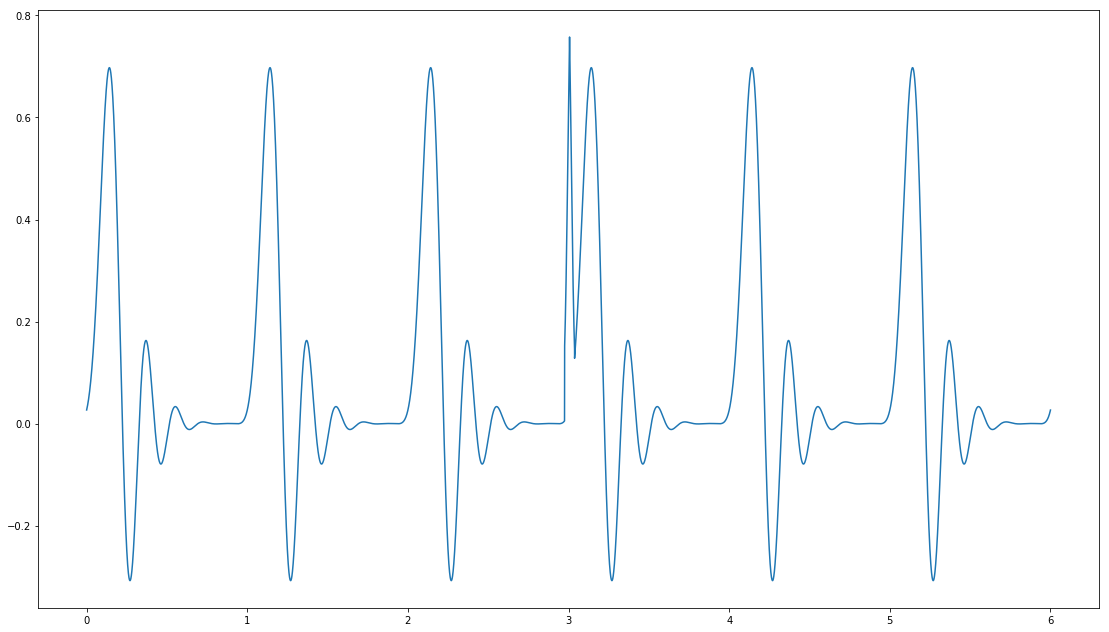

In [76]:
fig = plt.figure(figsize = a4_dims)
ecg_point_anomaly = np.copy(ecg)
ecg_point_anomaly[int(len(ecg)/2)-200:int(len(ecg)/2-200)+int(len(sig))]= ecg_point_anomaly[int(len(ecg)/2)]+sig

plt.plot(t, ecg_point_anomaly)
plt.show()


In [77]:
np.array([ecg[-1]]*15)

array([0.02649547, 0.02649547, 0.02649547, 0.02649547, 0.02649547,
       0.02649547, 0.02649547, 0.02649547, 0.02649547, 0.02649547,
       0.02649547, 0.02649547, 0.02649547, 0.02649547, 0.02649547])

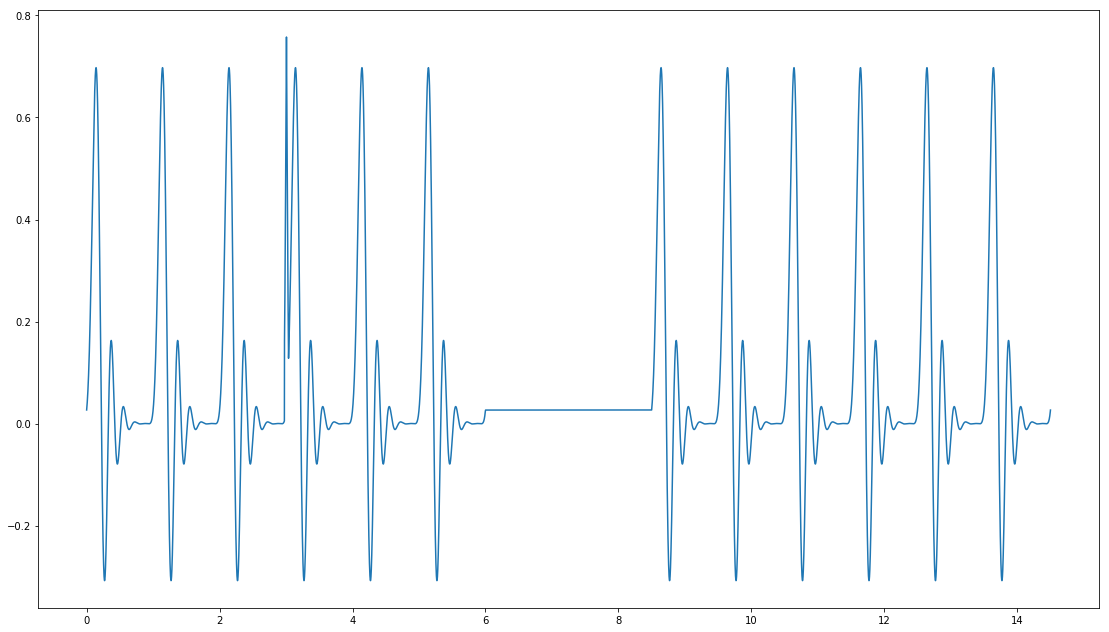

array([0.02667006, 0.02684549, 0.02702176, ..., 0.02614883, 0.02632173,
       0.02649547])

In [78]:
fig = plt.figure(figsize = a4_dims)
ecg_anomaly = np.concatenate((ecg_point_anomaly, np.array([ecg[-1]]*20000), ecg))
t_new = scipy.arange(len(ecg)*2+20000)/fs
plt.plot(t_new, ecg_anomaly)
plt.show()
ecg_anomaly


In [1]:
import pylab
import scipy.signal as signal
import numpy 

print('Simulating heart ecg')

# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype=float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

# Plot the heart signal template
pylab.plot(pqrst_full)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart beat signal Template')
pylab.show()

# Simulated Beats per minute rate
# For a health, athletic, person, 60 is resting, 180 is intensive exercising
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
pylab.plot(ecg_template)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template')
pylab.show()

# Add random (gaussian distributed) noise 
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

# Plot the noisy heart ECG template
pylab.plot(ecg_template_noisy)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template with Gaussian noise')
pylab.show()


# Simulate an ADC by sampling the noisy ecg template to produce the values
# Might be worth checking nyquist here 
# e.g. sampling rate >= (2 * template sampling rate)
sampling_rate = 50.0
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, int(num_samples))

# Scale the normalised amplitude of the sampled ecg to whatever the ADC 
# bit resolution is
# note: check if this is correct: not sure if there should be negative bit values. 
adc_bit_resolution = 1024
ecg =  adc_bit_resolution * ecg_sampled

# Plot the sampled ecg signal
pylab.plot(ecg)
pylab.xlabel('Sample number')
pylab.ylabel('bit value')
pylab.title('%d bpm ECG signal with gaussian noise sampled at %d Hz' %(bpm, sampling_rate) )
pylab.show()

print('saving ecg values to file')
numpy.savetxt("ecg_values.csv", ecg, delimiter=",", header='ecg')
print('Done')

Simulating heart ecg


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

saving ecg values to file
Done


In [80]:
df

,height,weight,target
0,1.778782,77.805331,1
1,1.918350,78.818063,1
2,1.707444,78.153438,1
3,1.474477,71.200179,1
4,1.785068,80.451750,1
5,1.611031,76.614705,1
6,1.793605,71.011012,1
7,1.762607,76.179408,1
8,1.824385,89.711234,1
9,1.932848,80.083332,1
